In [1]:
import pandas as pd
import numpy as np

import acquire as acq
import prepare as prep
import stats_conclude as sc
import evaluate as ev

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Load In successful, awaiting commands...
Load In successful, awaiting commands...


Use titanic data

> ## Acquire

In [2]:
df = acq.get_titanic_data()

csv file found and loaded


In [3]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


> ## Prepare

In [4]:
dft = prep.clean_titanic(df)

In [5]:
dft.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [6]:
dft.drop(columns=['passenger_id', 'sex', 'embark_town', 'embark_town_Queenstown'], inplace=True)

In [7]:
dft.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Southampton
0,0,3,1,0,7.2500,0,1,1
1,1,1,1,0,71.2833,0,0,0
2,1,3,0,0,7.9250,1,0,1
3,1,1,1,0,53.1000,0,0,1
4,0,3,0,0,8.0500,1,1,1


In [8]:
# split
train, validate, test = prep.split_titanic(dft)
train.shape, validate.shape, test.shape

((534, 8), (178, 8), (179, 8))

In [9]:
train.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Southampton
455,1,3,0,0,7.8958,1,1,0
380,1,1,0,0,227.5250,1,0,0
492,0,1,0,0,30.5000,1,1,1
55,1,1,0,0,35.5000,1,1,1
243,0,3,0,0,7.1250,1,1,1


In [10]:
target = 'survived'
X_train = train.iloc[:,1:]
X_validate = validate.iloc[:,1:]
X_test = test.iloc[:,1:]
y_train = train[target]
y_validate = validate[target]
y_test = test[target]

1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

2. Evaluate your results using the model score, confusion matrix, and classification report.

3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

4. Run through steps 1-3 setting k to 10

5. Run through steps 1-3 setting k to 20

6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

7. Which model performs best on our out-of-sample data from validate?


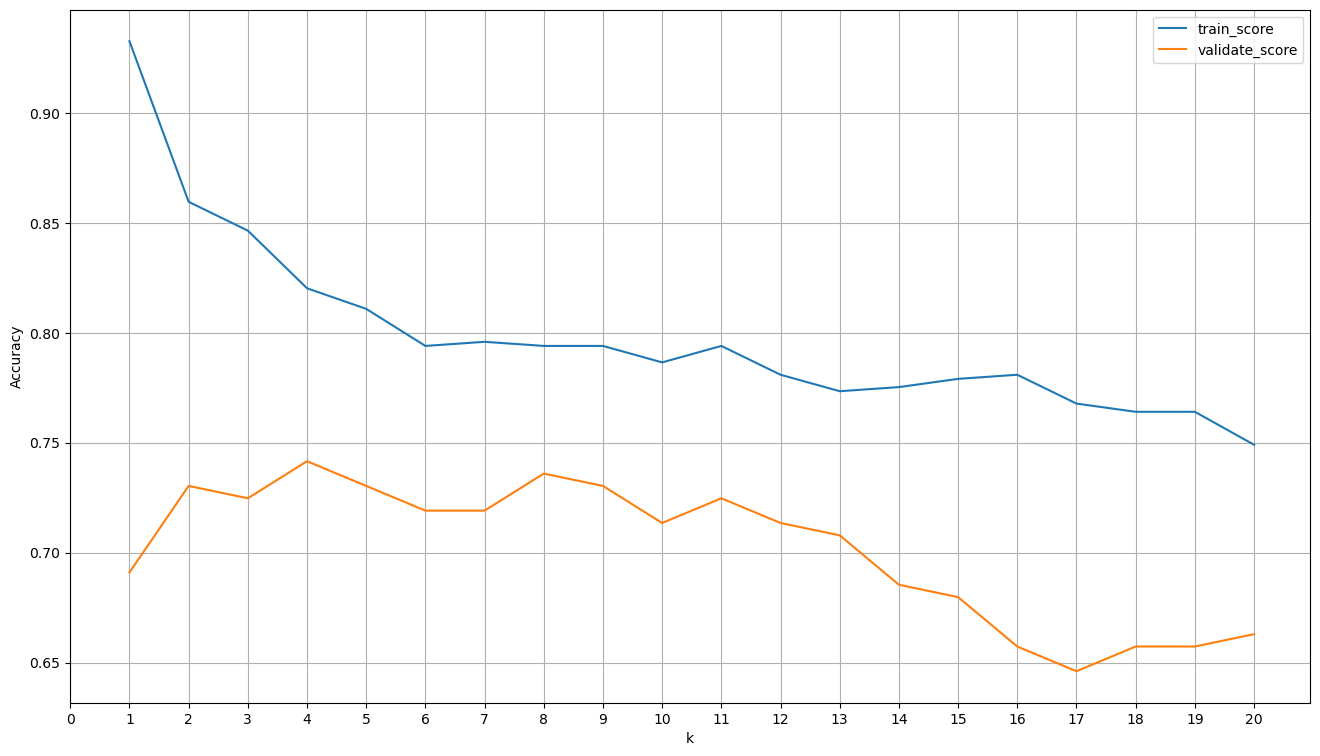

In [11]:
metrics = []
for k in range(1,21):
    
    # MAKE the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # FIT the thing
    knn.fit(X_train, y_train)
    
    # USE the thing (calculate accuracy)
    train_score = knn.score(X_train, y_train)
    validate_score = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_score": train_score,
        "validate_score": validate_score
    }
    
    metrics.append(output)
    
#convert to df
results = pd.DataFrame(metrics)

# plot the data
results.set_index('k').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

if k in range (1,21):
    k = (results.train_score-results.validate_score).idxmin()
    

In [12]:
# k10
knn10 = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn10.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [13]:
# k10 confusion matrix
y_pred10 = knn10.predict(X_train)
y_pred10[:5]

array([0, 1, 1, 0, 0])

In [14]:
y_pred_proba10 = knn10.predict_proba(X_train)
conf10 = confusion_matrix(y_train, y_pred10)
conf10

array([[286,  43],
       [ 71, 134]])

In [15]:
labels = sorted(y_train.unique())

In [16]:
pd.crosstab(y_train, y_pred10)

col_0,0,1
survived,,
0,286,43
1,71,134


In [17]:
pd.DataFrame(conf10, index=[str(label) + '_actual'for label in labels],
            columns=[str(label) + '_predict'for label in labels])

,0_predict,1_predict
0_actual,286,43
1_actual,71,134


In [18]:
print(classification_report(y_train, y_pred10))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       329
           1       0.76      0.65      0.70       205

    accuracy                           0.79       534
   macro avg       0.78      0.76      0.77       534
weighted avg       0.78      0.79      0.78       534



In [19]:
TN, FP, FN, TP = conf10.ravel()
TN, FP, FN, TP

(286, 43, 71, 134)

In [20]:
all_ = (TP + TN + FP + FN)

accuracy = (TP + TN) / all_
print(f"Accuracy: {accuracy}\n")

TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)
print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")

TNR = TN / (FP + TN)
FNR = FN / (FN + TP)
print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
print(f"False Negative Rate/Miss Rate: {FNR}\n")

precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))
print(f"Precision/PPV: {precision}")
print(f"F1 Score: {f1}\n")

support_pos = TP + FN
support_neg = FP + TN
print(f"Support (0=Not Survived): {support_pos}")
print(f"Support (1=Survived): {support_neg}")

Accuracy: 0.7865168539325843

True Positive Rate/Sensitivity/Recall/Power: 0.6536585365853659
False Positive Rate/False Alarm Ratio/Fall-out: 0.13069908814589665
True Negative Rate/Specificity/Selectivity: 0.8693009118541033
False Negative Rate/Miss Rate: 0.3463414634146341

Precision/PPV: 0.7570621468926554
F1 Score: 0.7015706806282723

Support (0=Not Survived): 205
Support (1=Survived): 329


In [21]:
# k20 confusion matrix
knn20 = KNeighborsClassifier(n_neighbors=20, weights='uniform')
knn20.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [22]:
y_pred20 = knn20.predict(X_train)
y_pred20[:5]

array([0, 1, 0, 0, 0])

In [23]:
y_pred_proba20 = knn20.predict_proba(X_train)
conf20 = confusion_matrix(y_train, y_pred20)
conf20

array([[287,  42],
       [ 92, 113]])

In [24]:
labels = sorted(y_train.unique())

In [25]:
pd.crosstab(y_train, y_pred20)

col_0,0,1
survived,,
0,287,42
1,92,113


In [26]:
pd.DataFrame(conf20, index=[str(label) + '_actual'for label in labels],
            columns=[str(label) + '_predict'for label in labels])

,0_predict,1_predict
0_actual,287,42
1_actual,92,113


In [27]:
print(classification_report(y_train, y_pred20))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       329
           1       0.73      0.55      0.63       205

    accuracy                           0.75       534
   macro avg       0.74      0.71      0.72       534
weighted avg       0.75      0.75      0.74       534



In [28]:
TN, FP, FN, TP = conf20.ravel()
TN, FP, FN, TP

(287, 42, 92, 113)

In [29]:
all_ = (TP + TN + FP + FN)

accuracy = (TP + TN) / all_
print(f"Accuracy: {accuracy}\n")

TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)
print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")

TNR = TN / (FP + TN)
FNR = FN / (FN + TP)
print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
print(f"False Negative Rate/Miss Rate: {FNR}\n")

precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))
print(f"Precision/PPV: {precision}")
print(f"F1 Score: {f1}\n")

support_pos = TP + FN
support_neg = FP + TN
print(f"Support (0=Not Survived): {support_pos}")
print(f"Support (1=Survived): {support_neg}")

Accuracy: 0.7490636704119851

True Positive Rate/Sensitivity/Recall/Power: 0.551219512195122
False Positive Rate/False Alarm Ratio/Fall-out: 0.1276595744680851
True Negative Rate/Specificity/Selectivity: 0.8723404255319149
False Negative Rate/Miss Rate: 0.44878048780487806

Precision/PPV: 0.7290322580645161
F1 Score: 0.6277777777777778

Support (0=Not Survived): 205
Support (1=Survived): 329


In [30]:
# k-10
results.iloc[9]

k                 10.000000
train_score        0.786517
validate_score     0.713483
Name: 9, dtype: float64

In [31]:
# k-20
results.iloc[19]

k                 20.000000
train_score        0.749064
validate_score     0.662921
Name: 19, dtype: float64

* Differences in eval metrics:
    * K-10 had overall better performance in all metrics. This was verified manually and with a for loop. K-20 provided too many neighbors and thus reduced accuracy performance but did decrease a small amount for false positive rates but increased the false negative rate.

* Which is better on training data?
    * K-10
* Which is better on validate data?
    * K-10

csv file found and loaded
The number of features sent in : 4 and are ['pclass', 'fare', 'alone', 'sex_male'].
7 is the number of neighbors that produces the best fit model
The accuracy score for the train model is 0.75.
The accuracy score for the validate model is 0.7.


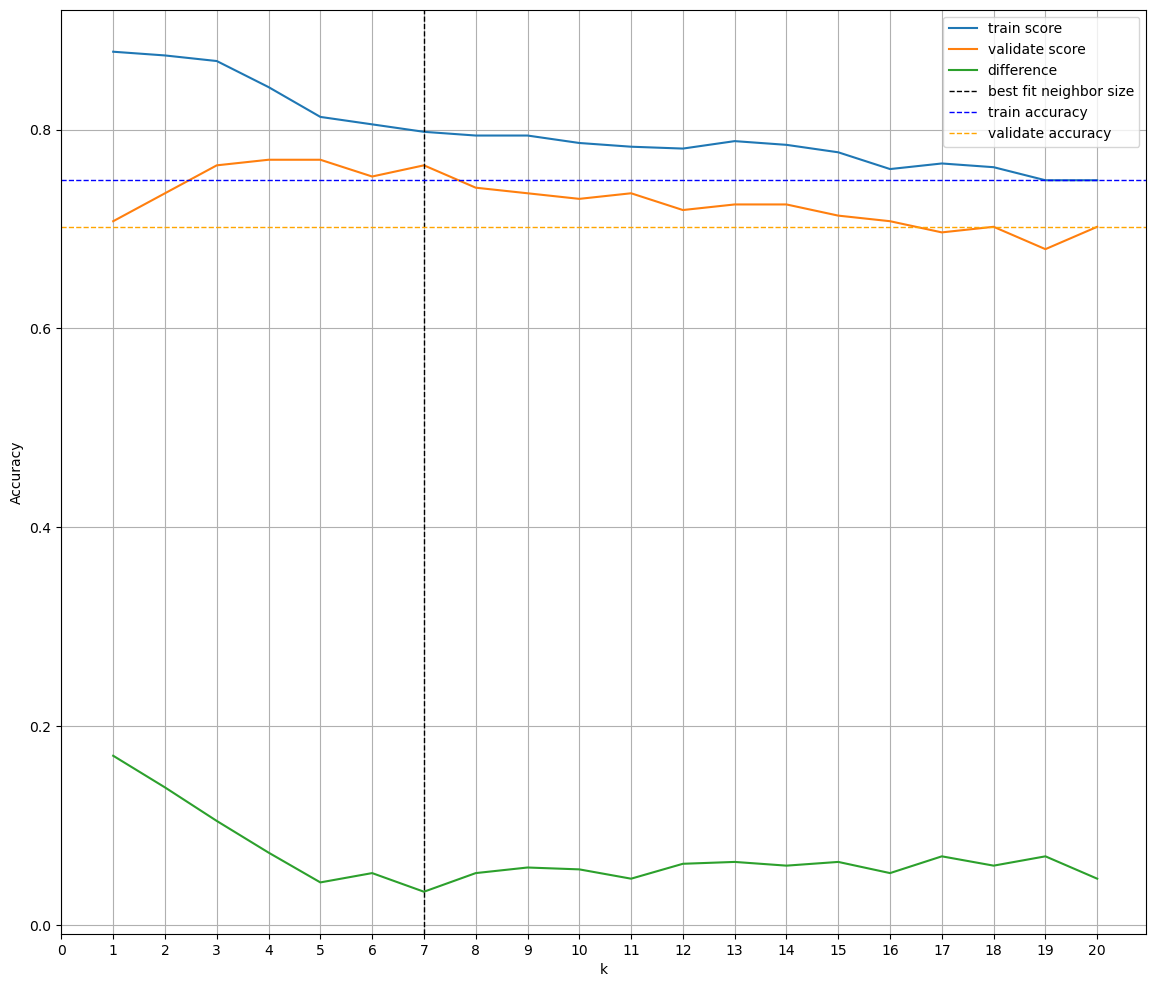

In [32]:
# or if you want it all in one go.....
ev.knn_titanic_acq_prep_split_evaluate()